In [121]:
!git clone https://github.com/Murahariah/randomwalk-ds-assessment-level2.git

fatal: destination path 'randomwalk-ds-assessment-level2' already exists and is not an empty directory.


In [124]:
import pandas as pd
import numpy as np

In [125]:
# Load the dataset
data_path = "/content/randomwalk-ds-assessment-level2/dataset.csv"
data = pd.read_csv(data_path)

**Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)**

**Answer:**

The dataset contains missing values in various columns, identified using a heatmap. To handle these missing values, I performed the following preprocessing steps:

Categorical Columns: For the 'sex' column, which contains 'unknown' as a placeholder, I replaced it with NaN and then filled missing values using the mode (most frequent value) of the column.
Numerical Columns: For other columns with missing numerical values, I filled them with the mean of the respective columns.
After these steps, I verified that no missing values remained in the dataset, ensuring data completeness for further analysis.

In [126]:
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [127]:
data.tail(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
334,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male
335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female
336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male
337,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female
338,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,unknown


In [128]:
# data inspection
print("Initial Data Overview:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
Initial Data Overview:
 None


In [129]:
data.isnull().sum()

,0
species,0
island,0
bill_length_mm,7
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,16


In [130]:
print("Unique values before cleaning:", data['sex'].unique())

Unique values before cleaning: ['male' 'female' nan 'unknown']


In [131]:
# Replace 'unknown' with NaN
data['sex'] = data['sex'].replace('unknown', np.nan)

In [132]:
data.tail(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
334,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male
335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female
336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male
337,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female
338,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,NaN


In [133]:
print("Unique values before cleaning:", data['sex'].unique())

Unique values before cleaning: ['male' 'female' nan]


In [134]:
data.isnull().sum()

,0
species,0
island,0
bill_length_mm,7
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,18


In [135]:
import pandas as pd
import plotly.express as px

missing_values = data.isnull()

fig = px.imshow(
    missing_values,
    labels=dict(x="Columns", y="Rows", color="Missing"),
    color_continuous_scale="Viridis",
    title="Heatmap of Missing Values"
)

fig.update_layout(
    xaxis=dict(tickangle=45, title="Columns"),
    yaxis=dict(title="Rows"),
    coloraxis_colorbar=dict(title="Missing")
)

fig.show()


In [136]:
data.isnull().mean().round(4)*100

,0
species,0.00
island,0.00
bill_length_mm,2.03
bill_depth_mm,0.58
flipper_length_mm,0.58
body_mass_g,0.58
sex,5.23


In [137]:
for column in data.columns:
    if data[column].isnull().sum() > 0:  # Check for missing values
        if data[column].dtype == 'object':  # For categorical columns
            data[column] = data[column].fillna(data[column].mode()[0])
        else:  # For numerical columns
            data[column] = data[column].fillna(data[column].mean())

print(data.isnull().sum())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [138]:
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,male


**Q2: What is the average body_mass_g for Gentoo penguins? (code)**

In [139]:
# Filter the dataset for Gentoo penguins
gentoo_data = data[data['species'] == 'Gentoo']

# Calculate the average body_mass_g for Gentoo penguins
average_body_mass_g = gentoo_data['body_mass_g'].mean()

# Print the result
print(f"The average body_mass_g for Gentoo penguins is: {average_body_mass_g}")


The average body_mass_g for Gentoo penguins is: 5126.806262969251


**Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)**

**Answer**

1. **Skewness and Kurtosis Calculation**:
   - Skewness and kurtosis were calculated for bill_length_mm and bill_depth_mm for each species using the scipy.stats.skew and scipy.stats.kurtosis functions.

2. **Visualization**:
   - Histograms and density plots were created to visualize the distributions of these features by species.

### Findings:

- **Bill Length (bill_length_mm)**:
  - **Adelie**: Positive skew (rightward) with platykurtic distribution (light tails).
  - **Chinstrap**: Slight negative skew with platykurtic distribution.
  - **Gentoo**: Positive skew (rightward) with leptokurtic distribution (heavier tails).

- **Bill Depth (bill_depth_mm)**:
  - **Adelie**: Positive skew (rightward) with platykurtic distribution.
  - **Chinstrap**: Slight negative skew with platykurtic distribution.
  - **Gentoo**: Negative skew (leftward) with platykurtic distribution.



     species  bill_length_skewness  bill_length_kurtosis  bill_depth_skewness  \
0     Adelie              0.162533             -0.228104             0.329209   
1  Chinstrap             -0.095936             -0.124011             0.006726   
2     Gentoo              0.712323              1.147647             0.334623   

   bill_depth_kurtosis  
0            -0.101072  
1            -0.898740  
2            -0.611126  


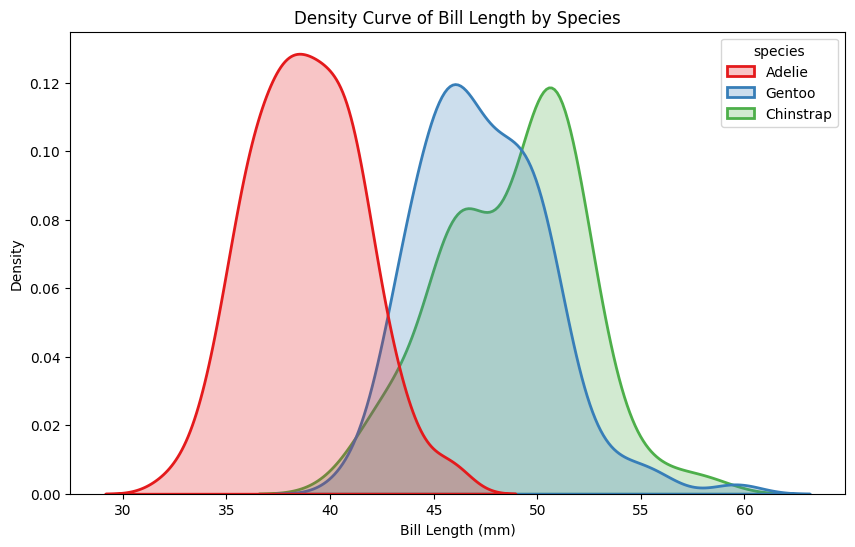

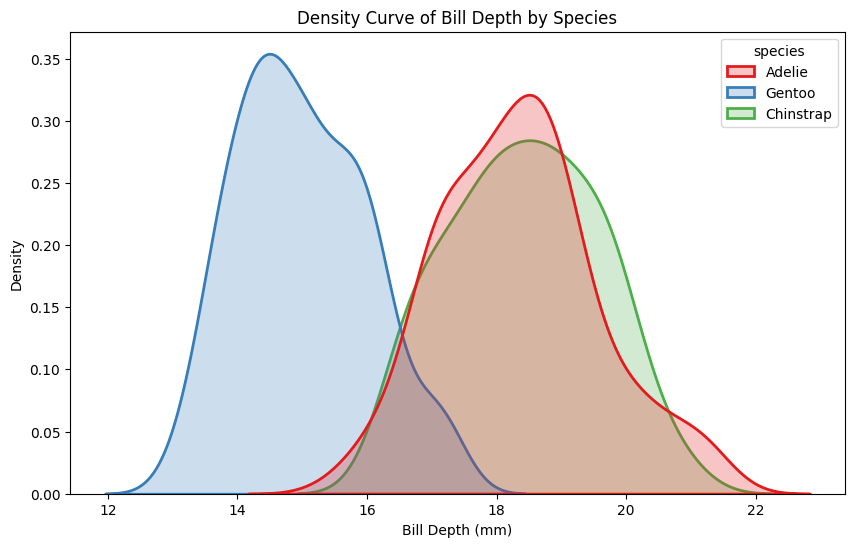

In [140]:
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate skewness and kurtosis for bill_length_mm and bill_depth_mm by species
stats_summary = data.groupby('species').agg(
    bill_length_skewness=('bill_length_mm', lambda x: skew(x)),
    bill_length_kurtosis=('bill_length_mm', lambda x: kurtosis(x)),
    bill_depth_skewness=('bill_depth_mm', lambda x: skew(x)),
    bill_depth_kurtosis=('bill_depth_mm', lambda x: kurtosis(x))
).reset_index()

print(stats_summary)

fig1 = px.histogram(data, x='bill_length_mm', color='species',
                    title='Distribution of Bill Length by Species',
                    labels={'bill_length_mm': 'Bill Length (mm)', 'count': 'Count'},
                    nbins=30)
fig1.update_layout(barmode='overlay')
fig1.update_traces(opacity=0.5)
fig1.show()


fig2 = px.histogram(data, x='bill_depth_mm', color='species',
                    title='Distribution of Bill Depth by Species',
                    labels={'bill_depth_mm': 'Bill Depth (mm)', 'count': 'Count'},
                    nbins=30)
fig2.update_layout(barmode='overlay')
fig2.update_traces(opacity=0.5)
fig2.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='bill_length_mm', hue='species', fill=True, common_norm=False,
            palette='Set1', linewidth=2)
plt.title('Density Curve of Bill Length by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='bill_depth_mm', hue='species', fill=True, common_norm=False,
            palette='Set1', linewidth=2)
plt.title('Density Curve of Bill Depth by Species')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Density')
plt.show()


**Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)**

**Answer:**

Outliers in the dataset were detected using the **IQR (Interquartile Range)** method. For each numerical column, the IQR was calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1). The lower and upper bounds were determined as:

- **Lower Bound:** \( Q1 - 1.5 * IQR \)
- **Upper Bound:** \( Q3 + 1.5 * IQR \)

Any data points outside these bounds were considered outliers. Specifically, the **'body_mass_g'** feature had outliers, which were detected and visualized through a **boxplot**. After identifying these outliers, they were removed from the dataset to ensure cleaner data for further analysis.

After removing outliers from the **'body_mass_g'** column, a final boxplot was plotted to confirm that the outliers were effectively eliminated.

In [141]:
import plotly.express as px

# Numerical columns to visualize
columns_to_plot = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in columns_to_plot:
    fig = px.box(data, y=col, title=f"Boxplot for {col}", template='plotly', width=500, height=400)
    fig.update_layout(
        yaxis_title="Values",
        xaxis_title="",
    )
    fig.show()


In [142]:
import plotly.express as px
import pandas as pd

# Numerical columns to visualize
columns_to_plot = ['body_mass_g']

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical column
for col in columns_to_plot:
    data = remove_outliers(data, col)

    # Generate individual boxplots
    fig = px.box(data, y=col, title=f"Boxplot for {col}", template='plotly', width=500, height=400)
    fig.update_layout(
        yaxis_title="Values",
        xaxis_title="",
    )
    fig.show()


**Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)**

The dataset includes 7 columns, which is not large enough to contribute to the curse of dimensionality. The curse typically affects datasets with high-dimensional feature spaces, making models more prone to overfitting and computational inefficiency. Since the number of features is small (7), this dataset does not face such issues, and applying PCA is not necessary.

Therefore, there is no contribution to the curse of dimensionality in this case.

**Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)**

**1. Scatter Plot**

In [143]:
import plotly.express as px

fig = px.scatter(
    data,
    x="bill_length_mm",
    y="bill_depth_mm",
    color="species",
    title="Bill Length vs. Bill Depth by Species",
    labels={"bill_length_mm": "Bill Length (mm)", "bill_depth_mm": "Bill Depth (mm)"}
)
fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.show()


**2. Box Plot**

In [144]:
fig = px.box(
    data,
    x="bill_length_mm",
    y="bill_depth_mm",
    color="species",
    title="Box Plot of Bill Depth by Bill Length",
    labels={"bill_length_mm": "Bill Length (mm)", "bill_depth_mm": "Bill Depth (mm)"}
)
fig.show()


**3. Faceted Scatter Plot**

In [145]:
fig = px.scatter(
    data,
    x="bill_length_mm",
    y="bill_depth_mm",
    color="species",
    facet_col="species",
    title="Faceted Scatter Plot of Bill Length vs. Bill Depth",
    labels={"bill_length_mm": "Bill Length (mm)", "bill_depth_mm": "Bill Depth (mm)"}
)
fig.show()


**4. Scatter Plot with Linear Regression Lines**

In [146]:
fig = px.scatter(
    data,
    x="bill_length_mm",
    y="bill_depth_mm",
    color="species",
    labels={"bill_depth_mm": "Bill Depth (mm)", "bill_length_mm": "Bill Length (mm)", "species": "Species"},
    trendline="ols"
)

fig.update_layout(title="Scatter Plot with Linear Regression Lines")
fig.show()

**5. Heatmap**

In [147]:
import plotly.graph_objects as go
import numpy as np

heatmap, x_edges, y_edges = np.histogram2d(
    data["bill_length_mm"], data["bill_depth_mm"], bins=30
)

fig = go.Figure(
    go.Heatmap(
        z=heatmap.T,
        x=x_edges,
        y=y_edges,
        colorscale="Blues",
        colorbar_title="Count"
    )
)
fig.update_layout(
    title="Heatmap of Bill Length vs. Bill Depth",
    xaxis_title="Bill Length (mm)",
    yaxis_title="Bill Depth (mm)",
)
fig.show()


**6. Violin Plot**

In [148]:
fig = px.violin(
    data,
    x="bill_length_mm",
    y="bill_depth_mm",
    color="species",
    box=True,
    points="all",
    title="Violin Plot of Bill Depth by Bill Length",
    labels={"bill_length_mm": "Bill Length (mm)", "bill_depth_mm": "Bill Depth (mm)"}
)
fig.show()


**7. Pair Plot with Scatter and Density**

In [149]:
import plotly.express as px

fig = px.scatter_matrix(
    data,
    dimensions=["bill_length_mm", "bill_depth_mm"],
    color="species",
    labels={
        "bill_length_mm": "Bill Length (mm)",
        "bill_depth_mm": "Bill Depth (mm)"
    }
)

for i, trace in enumerate(fig.data):
    if trace.diagonal:
        fig.data[i].update(opacity=0.7)

fig.update_traces(marker=dict(size=7, opacity=0.6))

fig.show()


**Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)**

In [151]:
# Group by species and island, then find the maximum flipper length
max_flipper_length = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Display the maximum flipper length for each species and island
print("Maximum flipper length for each species and island:")
print(max_flipper_length)

# Find the species with the longest flippers for each island
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

# Display the species with the longest flippers on each island
print("\nSpecies with the longest flippers on each island:")
print(longest_flippers)

# Create a bar chart to visualize the species with the longest flippers on each island
import plotly.express as px

fig = px.bar(
    longest_flippers,
    x='island',
    y='flipper_length_mm',
    color='species',
    title='Species with the Longest Flippers on Each Island',
    labels={
        'flipper_length_mm': 'Maximum Flipper Length (mm)',
        'island': 'Island'
    },
    category_orders={'island': longest_flippers['island'].unique().tolist()}
)

# Update the layout to group bars by category
fig.update_layout(barmode='group')

# Show the plot
fig.show()


Maximum flipper length for each species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


**Q8: Perform z-score normalization on this dataset. (code)**

The Z-score is calculated using the formula:

Z= (X−μ) ÷ σ

Where:

X is the data point,

μ is the mean of the column,

σ is the standard deviation of the column.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numeric columns for Z-score normalization (excluding non-numeric columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply Z-score normalization
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print(data.head)


<bound method NDFrame.head of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen       -0.874816       0.788986          -1.421574   
1       Adelie  Torgersen       -0.801010       0.127441          -1.064759   
2       Adelie  Torgersen       -0.653398       0.432769          -0.422492   
3       Adelie  Torgersen        0.006585       0.000816          -0.000365   
4       Adelie  Torgersen       -1.317652       1.094314          -0.565218   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream        2.206583       1.348754           0.433864   
340  Chinstrap      Dream       -0.062950       0.483657           0.077049   
341  Chinstrap      Dream        1.062591       0.534545          -0.565218   
342  Chinstrap      Dream        1.284008       0.941650           0.647953   
343  Chinstrap      Dream        1.173300       0.788986          -0.208403   

     body_mass_g     